In [13]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import datasets.mvtec as mvtec
import cv2

from __init__ import *



In [31]:
tic = time.perf_counter()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
features_model = Resnet18Features(device)

mean = torch.load('./distributions/up_mean_test2.pt').to(device)
cov_inv = torch.load('./distributions/up_cov_inv_test2.pt').to(device)

batch = toBatch(images, device)

indices = getOriginalResnet18Indicies(device)
thresh = 10
patch_scores, image_scores, patch_classifications, image_classifications = anomalyDetection(batch, features_model, mean, cov_inv, device, thresh, indices=indices)

print(time.perf_counter()-tic)


0.44265246397117153


In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


0.00013807904906570911


In [34]:
tic = time.perf_counter()
features_model = Resnet18Features(device)
# features_model = WideResnet50Features(device)
print(time.perf_counter()-tic)

0.2868540419731289


In [17]:
tic = time.perf_counter()
mean = torch.load('./distributions/up_mean_test2.pt').to(device)
cov_inv = torch.load('./distributions/up_cov_inv_test2.pt').to(device)
print(time.perf_counter()-tic)


0.06895141099812463


In [18]:
paths = [
    '../data/aligned_pucks/defect_up/1622451238634_right_0_up.png', 
    '../data/aligned_pucks/defect_up/1622451238634_right_1_up.png', 
    '../data/aligned_pucks/defect_up/1622451238634_right_2_up.png', 
    '../data/aligned_pucks/defect_up/1622451238634_right_3_up.png', 
    '../data/aligned_pucks/defect_up/1622451238634_right_4_up.png', 
]
images = []
for path in paths:
    im = cv2.imread(path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    images.append(im)

In [27]:
tic = time.perf_counter()
batch = toBatch(images, device)
print(time.perf_counter()-tic)


0.039525147003587335


In [20]:
batch.shape

torch.Size([5, 3, 224, 224])

In [21]:
indices = getOriginalResnet18Indicies(device)
thresh = 10

In [28]:
tic = time.perf_counter()
patch_scores, image_scores, patch_classifications, image_classifications = anomalyDetection(batch, features_model, mean, cov_inv, device, thresh, indices=indices)
print(time.perf_counter()-tic)


0.07090731494827196


In [23]:
image_scores

tensor([ 4.8866,  6.1868, 21.0570,  5.1136, 24.5634], device='cuda:0')

In [24]:
image_classifications

tensor([1., 1., 0., 1., 0.], device='cuda:0')

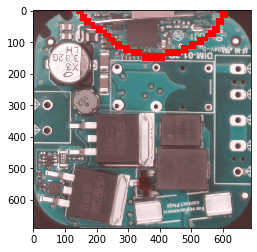

In [25]:
img = getBoundaryImage(images[2], patch_classifications[2], 690)
plt.imshow(img)
plt.show()

0.11466279998421669


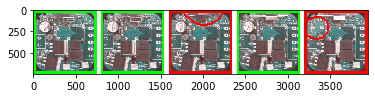

In [29]:
tic = time.perf_counter()
img = getBoundaryImageClassificationGroup(images, patch_classifications, image_classifications, 690)
print(time.perf_counter()-tic)

plt.imshow(img)
plt.show()